# Social Media Tweet Exploratory Data Analysis (EDA) on Twitter Dataset

## 1. Importing the necessary python packages 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import sys

sys.path.append(os.path.abspath(os.path.join("./..")))

# custom modules from Day-1
from extract_dataframe import read_json, TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

## 2. Data acquisition
- From the json file given on Day 1 we can extract tweet_data using the extract_dataframe
 1. First tweet_list is generated from the json using read_json function
 2. From the list tweet_data DataFrame is created

In [7]:
_, tweet_list = read_json("../data/global_twitter_data.json")
tweet = TweetDfExtractor(tweet_list)
tweet_data = tweet.get_tweet_df(save=False)
tweet_data.head(50)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,None,[City],[i_ameztoy],None
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,None,"[China, Taiwan]",[IndoPac_Info],None
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,None,[XiJinping],[ZelenskyyUa],Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,None,[XiJinping],None,Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,None,None,[ChinaUncensored],"Ayent, Schweiz"
5,Sun Aug 07 22:31:02 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,2.000000e-01,0.500000,en,0,36,GraceCh15554845,207,54,False,[Taiwan],[benedictrogers],"Melbourne, Victoria"
6,Sun Aug 07 22:30:59 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @TGTM_Official: What kind of country can co...,1.583333e-01,0.800000,en,0,411,Philipkuma1,12,264,None,"[Taiwan, TsaiIngwen]",[TGTM_Official],None
7,Sun Aug 07 22:30:59 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd singer Roger Wate...,0.000000e+00,0.000000,en,0,5,nhohn2011,870,508,None,"[PinkFloyd, Taiwan, China]",[ChinaInfo777],"Florida, USA"
8,Sun Aug 07 22:30:50 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @AmbQinGang: China's SC&amp;FM Wang Yi elab...,0.000000e+00,0.000000,en,0,239,ClaudioColomaRI,127,263,None,[Taiwan],[AmbQinGang],El mundo periférico
9,Sun Aug 07 22:30:45 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CGMeifangZhang: Chinese ambassador to the ...,2.000000e-01,0.375000,en,0,25,jmarzola1,213,877,None,"[USA, Pelosi, Taiwan, China]",[CGMeifangZhang],None


In [8]:
# print the information regarding each columns in dataframe
tweet_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   original_text       22000 non-null  object 
 3   polarity            22000 non-null  float64
 4   subjectivity        22000 non-null  float64
 5   lang                22000 non-null  object 
 6   favorite_count      22000 non-null  int64  
 7   retweet_count       22000 non-null  int64  
 8   original_author     22000 non-null  object 
 9   followers_count     22000 non-null  int64  
 10  friends_count       22000 non-null  int64  
 11  possibly_sensitive  6191 non-null   object 
 12  hashtags            19141 non-null  object 
 13  user_mentions       18698 non-null  object 
 14  place               12108 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+

### missing values
- Identify the columns with missing value
- Draw the missing values count on barchart

In [48]:
missing_values = tweet_data.isnull().sum()
print(f"Missing value(s) count: \n{missing_values}")

Missing value(s) count: 
created_at                0
source                    0
original_text             0
polarity                  0
subjectivity              0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    15809
hashtags               2859
user_mentions          3302
place                  9892
dtype: int64


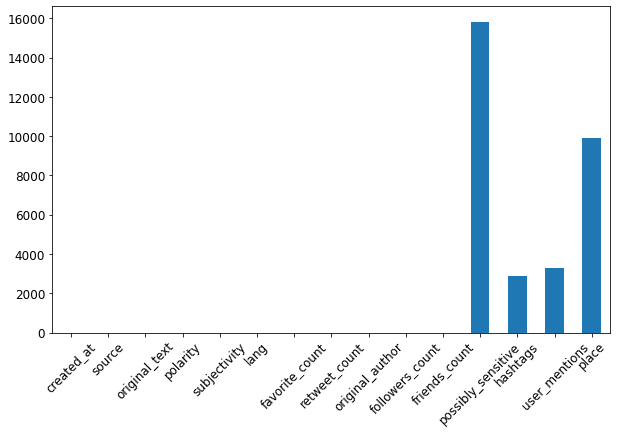

In [49]:
fig = missing_values.plot(kind='bar',fontsize=12, figsize=(10, 6), rot=45).get_figure()
fig.savefig("missing_values_bar_chart.png")

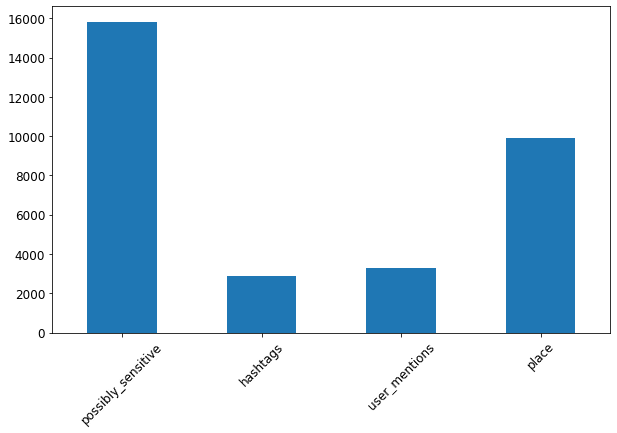

In [51]:
only_missing_count = missing_values.copy()
only_missing_count= only_missing_count.drop(labels=['created_at','source','original_text','polarity',
                                                    'subjectivity','lang','favorite_count',
                                                    'retweet_count','original_author','followers_count',
                                                    'friends_count' ])
fig = copy_missing_count.plot(kind='bar', fontsize=12, figsize=(10, 6), rot=45).get_figure()
fig.savefig("bar_chart_for_missing_columns.png")

## 3. Data preparation
### Data cleaning
- Before further use of the data using the clean_tweets_dataframe python file
 1. Drop unwanted rows 
 2. Convert to datetime - for created_at columns
 3. Convert to numbers for 
  - polarity, subjectivity, retweet_count, favorite_count, followers_count, friends_count
 4. Fill all the none value in possibly_sensitive with False
 5. Drop all the rows with none value
 6. Remove user stopwords, links,special characters, mentions, and hashtag from the tweet text
 7. Expand text such you're to you are
 8. Convert the tweet text lower-case
 ### finally change the original_text to clean_text - column rename

In [10]:
clean_tweet = Clean_Tweets(tweet_data)
clean_tweet_data = clean_tweet.clean_tweet(tweet_data, save_csv=False)
clean_tweet_data.head()

,created_at,source,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...",china even cut communication anwer phonecalls ...,0.0,0.0,en,0,0,fin21free,85,392,False,xijinping,zelenskyyua,netherlands
1,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",must let happen must ready must defend,0.2,0.5,en,0,36,gracech15554845,207,54,False,taiwan,benedictrogers,"melbourne, victoria"
2,2022-08-07 22:30:59+00:00,"<a href=""http://twitter.com/download/android"" ...",singer roger waters rebukes says part know go ...,0.0,0.0,en,0,5,nhohn2011,870,508,False,pinkfloyd taiwan china,chinainfo777,"florida, usa"
3,2022-08-07 22:30:50+00:00,"<a href=""http://twitter.com/download/android"" ...",china sc amp fm wang yi elaborates china posit...,0.0,0.0,en,0,239,claudiocolomari,127,263,False,taiwan,ambqingang,el mundo periférico
4,2022-08-07 22:30:15+00:00,"<a href=""http://twitter.com/download/android"" ...",china largest taiwan military drills draw close,-0.1,0.1,en,0,1,fortunefrien,336,1026,False,china diplomacy militarydrills taiwan us,eaglenews,"san jose del monte, central lu"


In [12]:
missing_count = clean_tweet_data.isnull().sum()

print(f"Missing value(s) count: \n{missing_count}")

Missing value(s) count: 
created_at            0
source                0
clean_text            0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64


In [13]:
def text_category(p)->str:
    if p<0:
        return 'negative'
    elif p==0:
        return 'neutral'
    else:
        return 'positive'

In [14]:
clean_tweet_data['score'] = clean_tweet_data['polarity'].apply(text_category)

<AxesSubplot:>

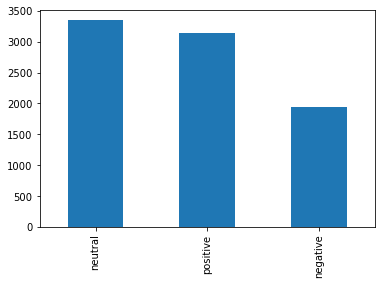

In [15]:
#barchart
clean_tweet_data['score'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='score'>

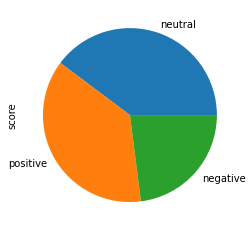

In [16]:
# piechar
clean_tweet_data['score'].value_counts().plot(kind='pie')

- Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.

- Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column

- Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.

- Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)

- Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.

- Evaluate your model on the test data.

In [17]:
clean_tweet_data = clean_tweet_data[clean_tweet_data['polarity']!=0]
clean_tweet_data.reset_index()
clean_tweet_data.head()

,created_at,source,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,score
1,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",must let happen must ready must defend,2.000000e-01,0.500000,en,0,36,gracech15554845,207,54,False,taiwan,benedictrogers,"melbourne, victoria",positive
4,2022-08-07 22:30:15+00:00,"<a href=""http://twitter.com/download/android"" ...",china largest taiwan military drills draw close,-1.000000e-01,0.100000,en,0,1,fortunefrien,336,1026,False,china diplomacy militarydrills taiwan us,eaglenews,"san jose del monte, central lu",negative
6,2022-08-07 22:28:44+00:00,"<a href=""http://twitter.com/download/android"" ...",opinion visit honour commitment democracy espe...,-3.750000e-01,1.000000,en,0,4,cyclorient,639,642,False,pelosi taiwan,euobs,"tokyo,japan",negative
7,2022-08-07 22:28:02+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",responding cnn reporter saying china busy enci...,1.000000e-01,0.300000,en,0,128,mauricioloren14,433,482,False,taiwan,cgmeifangzhang,"gravatal, brasil",positive
8,2022-08-07 22:27:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",media explains military reasons area drills st...,6.938894e-18,0.241667,en,0,112,kisdurka,117,316,False,china taiwan,indopac_info,prague,positive


In [18]:
clean_tweet_data['scoremap'] = clean_tweet_data['score'].apply(lambda x: 0 if x=='negative' else 1)
clean_tweet_data.head()

,created_at,source,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,score,scoremap
1,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",must let happen must ready must defend,2.000000e-01,0.500000,en,0,36,gracech15554845,207,54,False,taiwan,benedictrogers,"melbourne, victoria",positive,1
4,2022-08-07 22:30:15+00:00,"<a href=""http://twitter.com/download/android"" ...",china largest taiwan military drills draw close,-1.000000e-01,0.100000,en,0,1,fortunefrien,336,1026,False,china diplomacy militarydrills taiwan us,eaglenews,"san jose del monte, central lu",negative,0
6,2022-08-07 22:28:44+00:00,"<a href=""http://twitter.com/download/android"" ...",opinion visit honour commitment democracy espe...,-3.750000e-01,1.000000,en,0,4,cyclorient,639,642,False,pelosi taiwan,euobs,"tokyo,japan",negative,0
7,2022-08-07 22:28:02+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",responding cnn reporter saying china busy enci...,1.000000e-01,0.300000,en,0,128,mauricioloren14,433,482,False,taiwan,cgmeifangzhang,"gravatal, brasil",positive,1
8,2022-08-07 22:27:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",media explains military reasons area drills st...,6.938894e-18,0.241667,en,0,112,kisdurka,117,316,False,china taiwan,indopac_info,prague,positive,1


In [19]:
X,y = np.array(clean_tweet_data['clean_text'],dtype='unicode'), clean_tweet_data['scoremap']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

SGDClassifier()

In [22]:
clf.score(X_test,y_test)

0.9248210023866349